In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\hongr\\kaggle\\flower'

In [3]:
import sys

print('--sys.version—')
print(sys.version)

--sys.version—
3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from PIL import Image

In [5]:
img = Image.open('archive/flowers/rose/14145188939_b4de638bd3_n.jpg')

In [6]:
print("img:",img)

img: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x220 at 0x15D8A355EE0>


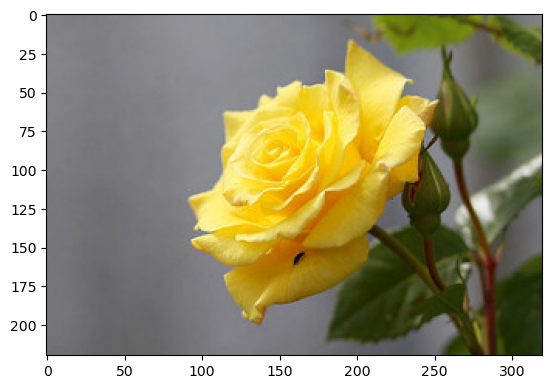

In [7]:
plt.imshow(img)
plt.draw()

plt.show()

In [8]:
img_array = np.array(img)
print('img_array:\n',img_array.shape)

img_array:
 (220, 320, 3)


In [9]:
path = 'archive/flowers/'

filenames = os.listdir(path)
print(filenames)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [10]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [11]:
path = 'archive/flowers/'

target_names = list_dir(path)
print(target_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [12]:
for dx, dname in enumerate(target_names):
    print("dname : ", dname)
    
    subpath = path + dname
    print("subpath : ", subpath)
    
    filenames = list_dir(subpath)
    print("filenames : ", filenames[:3])

dname :  daisy
subpath :  archive/flowers/daisy
filenames :  ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath :  archive/flowers/dandelion
filenames :  ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath :  archive/flowers/rose
filenames :  ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath :  archive/flowers/sunflower
filenames :  ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath :  archive/flowers/tulip
filenames :  ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [14]:
imagepath = os.path.join(subpath, filenames[5])
print("imagepath :", imagepath)

imagepath : archive/flowers/tulip\10164073235_f29931d91e.jpg


In [15]:
img       = Image.open(imagepath)
resized   = img.resize([100,100])
img_array = np.array(resized)

print("img_array : \n", img_array)

img_array : 
 [[[ 40  59  53]
  [ 41  47  35]
  [ 37  40  14]
  ...
  [165 181 194]
  [126 129 146]
  [  4   2   2]]

 [[ 34  41  45]
  [ 73  99 118]
  [ 40  56  52]
  ...
  [149 167 178]
  [146 159 174]
  [ 47  42  50]]

 [[ 39  50  64]
  [ 79 123 156]
  [ 57  85 104]
  ...
  [149 164 175]
  [163 180 195]
  [ 66  69  77]]

 ...

 [[ 98 110  23]
  [ 95 114  42]
  [ 93 117  60]
  ...
  [ 25  31  16]
  [ 21  33  26]
  [ 43  62  48]]

 [[102 105  31]
  [106 121  29]
  [ 73  86  41]
  ...
  [ 19  27   4]
  [ 23  33  32]
  [ 58  72 108]]

 [[ 28  40   3]
  [103 121  20]
  [ 80 100  31]
  ...
  [ 22  35   2]
  [ 22  28  27]
  [ 58  66  71]]]


#이미지 크기조정

In [18]:
def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath)
    img_resized = img.resize(resolution)
    
    #numpy 로 전환
    return np.array(img_resized)

In [20]:
resolution = [100,100]
print('imagepath:',imagepath)
pixels = load_image_pixels(imagepath, resolution)
print('pixels.shape : ',pixels.shape)

imagepath: archive/flowers/tulip\10164073235_f29931d91e.jpg
pixels.shape :  (100, 100, 3)


In [26]:
def flowers_init(resolution):
    
    path = 'archive/flowers/'
    target_names = list_dir(path)
    
    images = [] #독립변수
    idxs   = [] #종속변수
    
    #dx가 인덱스 넘버, 이 인덱스 넘버는 꽃 종류 폴더 이다.
    
    for dx, dname in enumerate(target_names):
        print("dname : ", dname)

        subpath = path + dname
        print("subpath : ", subpath)

        filenames = list_dir(subpath)
        print("filenames : ", filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
    xs = np.asarray(images, dtype=np.float32)
    
    return xs, idxs
            

In [27]:
xs, idxs = flowers_init(resolution=[100,100])

dname :  daisy
subpath :  archive/flowers/daisy
filenames :  ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath :  archive/flowers/dandelion
filenames :  ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath :  archive/flowers/rose
filenames :  ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath :  archive/flowers/sunflower
filenames :  ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath :  archive/flowers/tulip
filenames :  ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [29]:
print("xs.shape : " , xs.shape)

xs.shape :  (4317, 100, 100, 3)


In [32]:
print('np.eye(5)[4] : ', np.eye(5)[4])
print('np.eye(5)[2] : ', np.eye(5)[2])

np.eye(5)[4] :  [0. 0. 0. 0. 1.]
np.eye(5)[2] :  [0. 0. 1. 0. 0.]


# 원핫벡터 처리하기

In [33]:
def onehot(idxs ,cnt):
    return np.eye(cnt)[idxs]

In [34]:
cnt = len(target_names)  # 꽃의 종류 개수
cnt

5

In [39]:
ys = onehot(idxs,cnt)
print(ys)

[0. 0. 0. 1. 0.]


In [38]:
idxs = 3

In [40]:
# 

In [41]:
def flowers_init(resolution):
    
    path = 'archive/flowers/'
    target_names = list_dir(path)
    
    images = [] #독립변수
    idxs   = [] #종속변수
    
    #dx가 인덱스 넘버, 이 인덱스 넘버는 꽃 종류 폴더 이다.
    
    for dx, dname in enumerate(target_names):
        print("dname : ", dname)

        subpath = path + dname
        print("subpath : ", subpath)

        filenames = list_dir(subpath)
        print("filenames : ", filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
    xs = np.asarray(images, dtype=np.float32)
    
    ys = onehot(idxs = idxs, cnt = len(target_names))   #원핫 벡터를 적용함.
    
    return xs, ys
            

In [42]:
xs, ys  = flowers_init([100,100])

dname :  daisy
subpath :  archive/flowers/daisy
filenames :  ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname :  dandelion
subpath :  archive/flowers/dandelion
filenames :  ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname :  rose
subpath :  archive/flowers/rose
filenames :  ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname :  sunflower
subpath :  archive/flowers/sunflower
filenames :  ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname :  tulip
subpath :  archive/flowers/tulip
filenames :  ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [44]:
print("xs.shape : ", xs.shape)
print('ys.shape : ', ys.shape)

xs.shape :  (4317, 100, 100, 3)
ys.shape :  (4317, 5)


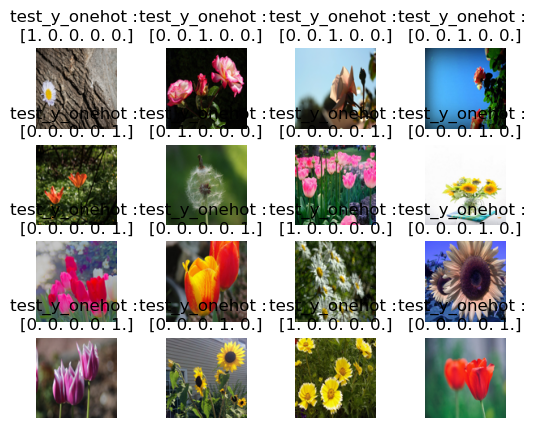

In [51]:


for i in range(16):
    plt.subplot(4,4,i+1)
    i = np.random.choice(4317)
    img = xs[i]
    
    img_image = Image.fromarray(np.uint8(img))  #2의 8승 까지 제한 (256개에 대한 범위를 표현)
    
    plt.title('test_y_onehot : \n{}'.format(ys[i]))
    plt.axis('off')  #축 값 안보기
    plt.imshow(img_image)
    
plt.show()

In [ ]:
#정규화

# x_new = (x-x_min) / (x_max-x_min)

In [52]:
print(xs.min())
print(xs.max())

0.0
255.0


In [53]:
xs_norm = xs / 255.0

In [54]:
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


In [56]:
shuffle_map = np.arange(xs_norm.shape[0])    #전체데이터 개수파악
np.random.shuffle(shuffle_map)
print("np.random.shuffle : ", shuffle_map)

np.random.shuffle :  [1601 2640 1835 ... 4068  364 3425]


In [57]:
#학습데이터 비율조정

train_ratio = 0.8

#독립변수 개수 파악

test_begin_index = int(xs_norm.shape[0] * train_ratio)

print('test_begin_index : ',test_begin_index)

test_begin_index :  3453


In [59]:
#학습데이터의 독립변수와 종속변수
#테스트데이터의 독립변수와 종속변수


train_x = xs_norm[shuffle_map[:test_begin_index]]
train_y = ys[shuffle_map[:test_begin_index]]

test_x = xs_norm[shuffle_map[test_begin_index:]]
test_y = ys[shuffle_map[test_begin_index:]]

In [61]:
print('train_x.shape' ,train_x.shape)
print('train_y.shape' ,train_y.shape)
print('test_x .shape' ,test_x .shape)
print('test_y .shape' ,test_y .shape)

train_x.shape (3453, 100, 100, 3)
train_y.shape (3453, 5)
test_x .shape (864, 100, 100, 3)
test_y .shape (864, 5)


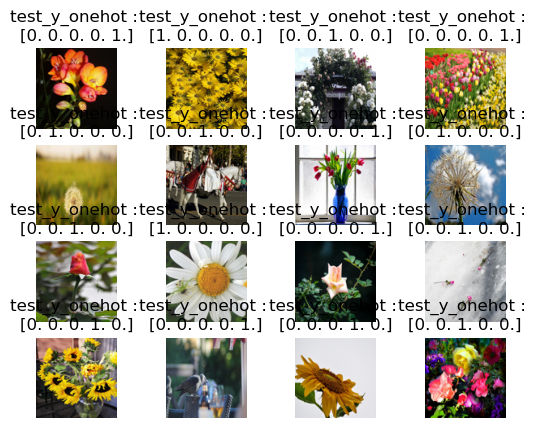

In [64]:


for i in range(16):
    plt.subplot(4,4,i+1)
    i = np.random.choice(3453)
    img = train_x[i]  
    
#     img_image = Image.fromarray(np.uint8(img))
    
    plt.title('test_y_onehot : \n{}'.format(train_y[i]))
    plt.axis('off')  #축 값 안보기
    plt.imshow(img)
    
plt.show()

In [66]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),  
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])


In [67]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 565504)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               72384640  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 72,408,869
Trainable params: 72,408,869
Non-trainable params: 0
____________________________________________

In [68]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [69]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

### vggNet 모델

In [70]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(100,100,32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])


In [71]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 256)      

In [72]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),
                loss = 'categorical_crossentropy',
                metrics = [tf.keras.metrics.TruePositives(name = 'TP'),
                          tf.keras.metrics.FalsePositives(name = 'FP')])


In [73]:
history = model_1.fit(train_x, train_y,
                      epochs = 50,
                      batch_size = 32,
                      validation_split = 0.2)

Epoch 1/50
87/87 [==============================] - 14s 160ms/step - loss: 1.5148 - TP: 9.0000 - FP: 6.0000 - val_loss: 1.4376 - val_TP: 16.0000 - val_FP: 4.0000
Epoch 2/50
87/87 [==============================] - 14s 158ms/step - loss: 1.3765 - TP: 111.0000 - FP: 56.0000 - val_loss: 1.3416 - val_TP: 50.0000 - val_FP: 20.0000
Epoch 3/50
87/87 [==============================] - 14s 166ms/step - loss: 1.2867 - TP: 302.0000 - FP: 154.0000 - val_loss: 1.2931 - val_TP: 88.0000 - val_FP: 52.0000
Epoch 4/50
87/87 [==============================] - 15s 173ms/step - loss: 1.2437 - TP: 435.0000 - FP: 213.0000 - val_loss: 1.2578 - val_TP: 104.0000 - val_FP: 47.0000
Epoch 5/50
87/87 [==============================] - 15s 168ms/step - loss: 1.2117 - TP: 559.0000 - FP: 254.0000 - val_loss: 1.2464 - val_TP: 137.0000 - val_FP: 64.0000
Epoch 6/50
87/87 [==============================] - 14s 164ms/step - loss: 1.1839 - TP: 632.0000 - FP: 301.0000 - val_loss: 1.2271 - val_TP: 167.0000 - val_FP: 76.0000
E

87/87 [==============================] - 14s 163ms/step - loss: 0.6557 - TP: 1786.0000 - FP: 262.0000 - val_loss: 1.2272 - val_TP: 287.0000 - val_FP: 196.0000
Epoch 50/50
87/87 [==============================] - 15s 167ms/step - loss: 0.6474 - TP: 1814.0000 - FP: 250.0000 - val_loss: 1.2476 - val_TP: 273.0000 - val_FP: 196.0000


In [74]:
model_1.save('flowers_init_1.h5')

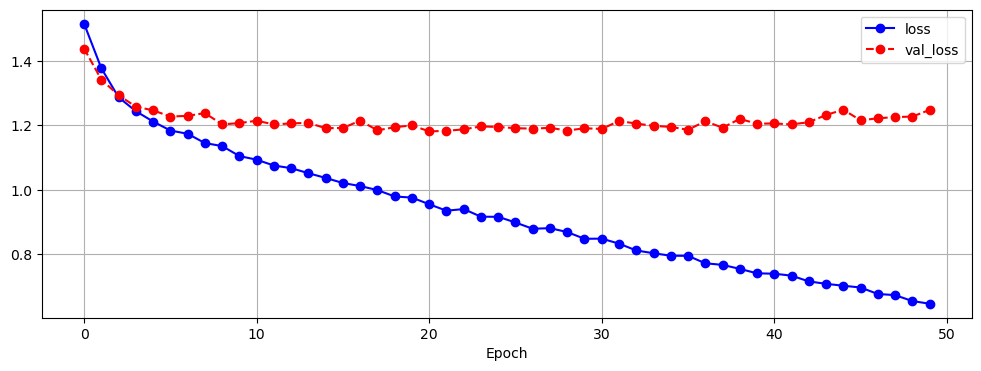

In [75]:
plt.figure(figsize = (12,4))

plt.plot(history.history['loss'],    'b-o', label = 'loss')
plt.plot(history.history['val_loss'],'r--o',label = 'val_loss')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.show()

In [76]:
model_1.evaluate(test_x,test_y)

27/27 [==============================] - 1s 37ms/step - loss: 1.1469 - TP: 369.0000 - FP: 209.0000


[1.146872878074646, 369.0, 209.0]

In [77]:
pred_y = model_1.predict(test_x)

In [78]:
np.round(pred_y,3 )

array([[0.   , 0.   , 0.089, 0.   , 0.911],
       [0.024, 0.007, 0.361, 0.403, 0.205],
       [0.076, 0.141, 0.087, 0.421, 0.275],
       ...,
       [0.044, 0.206, 0.012, 0.404, 0.335],
       [0.838, 0.137, 0.004, 0.009, 0.012],
       [0.04 , 0.037, 0.255, 0.283, 0.384]], dtype=float32)

pred_y_18 -> 3
test_y_18 -> 3
Prob : [0.044 0.109 0.217 0.355 0.275]


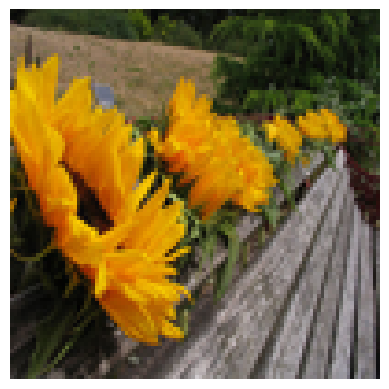

In [79]:
test_index = 18

print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))
print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))

print("Prob : {}".format(np.round(pred_y[test_index],3)))

img = test_x[test_index]

plt.imshow(img)
plt.axis('off')
plt.show()

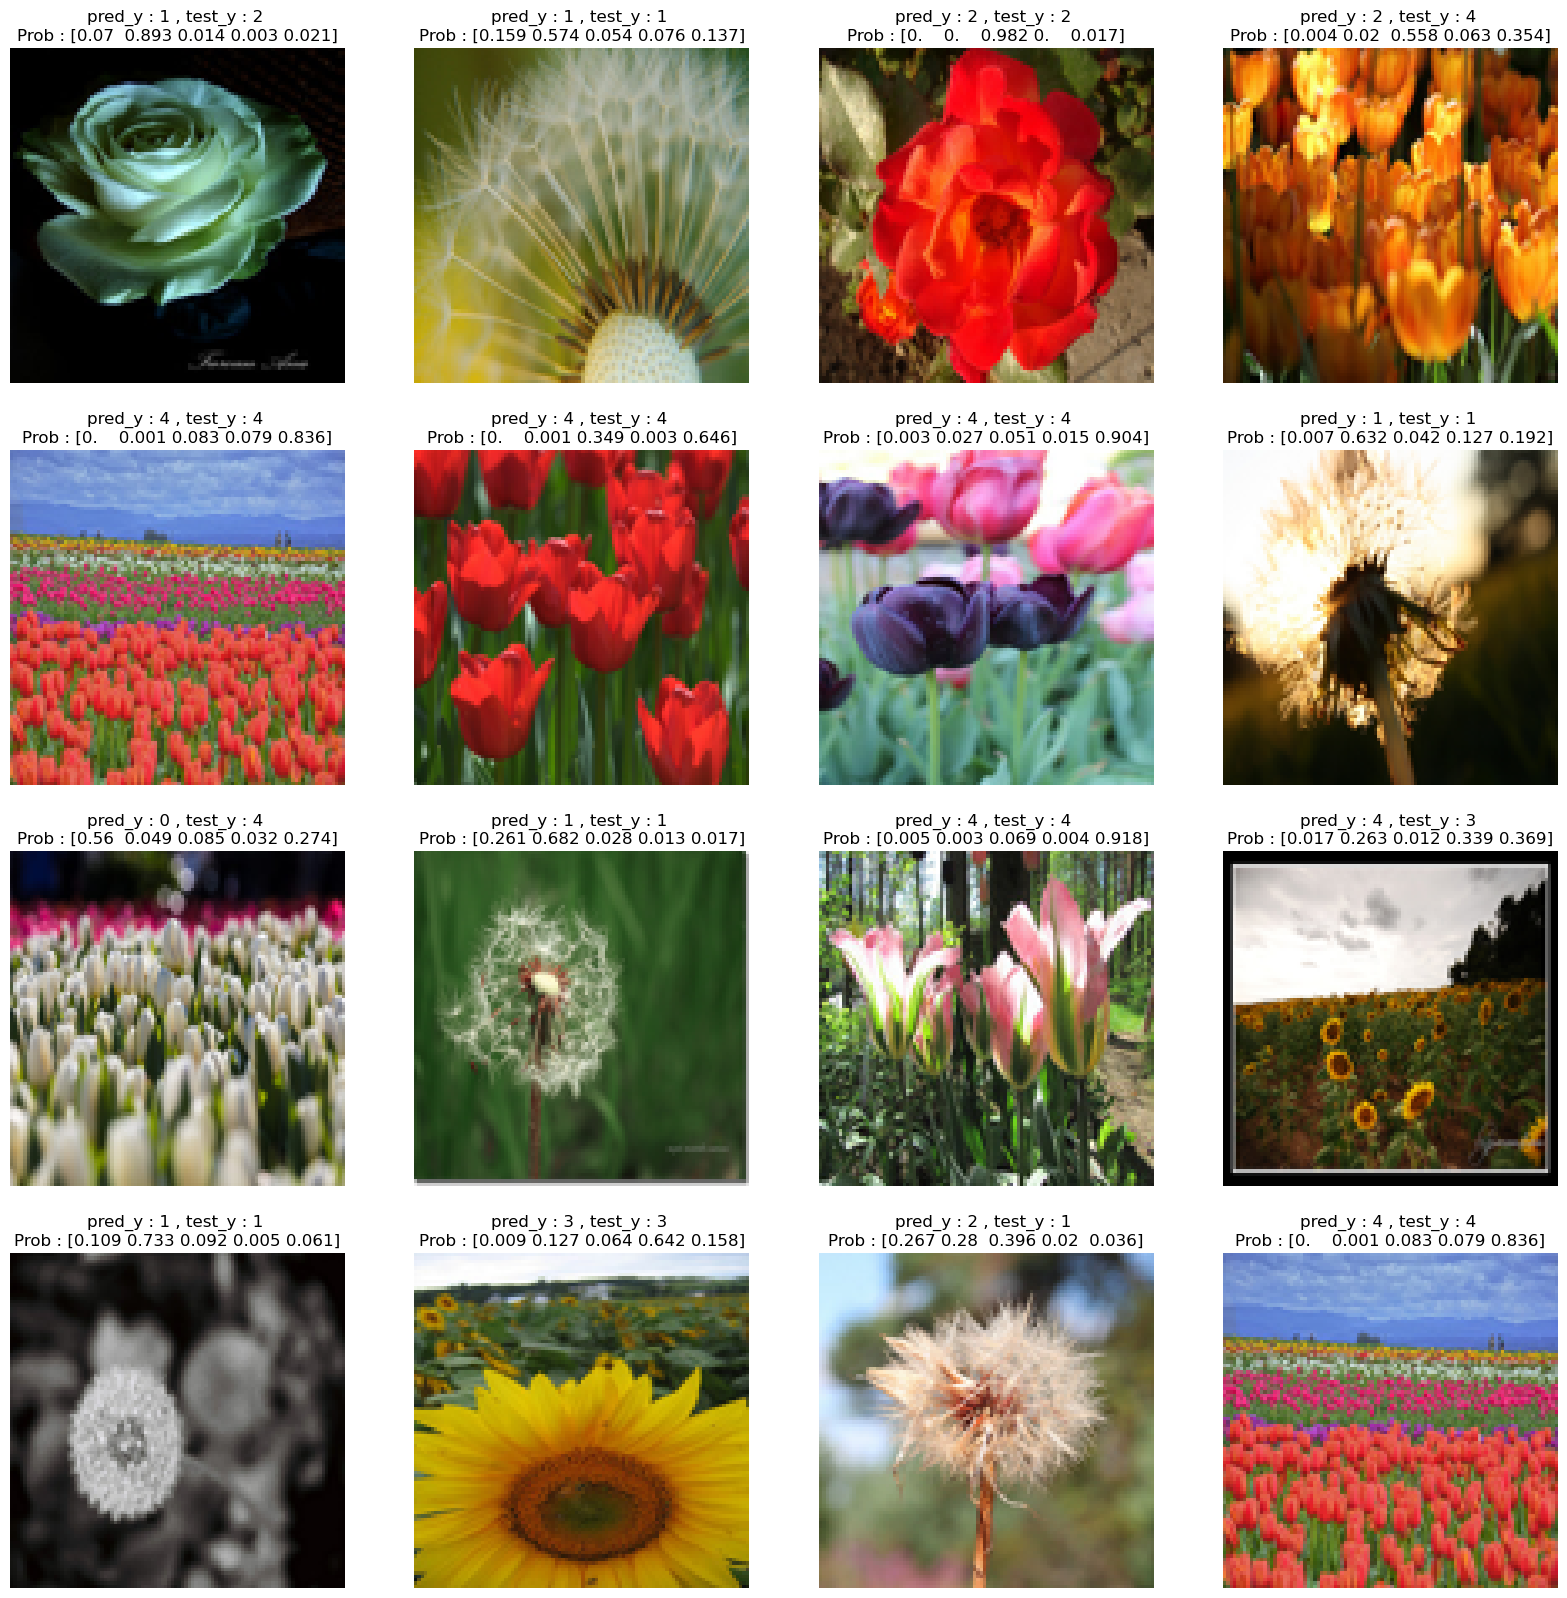

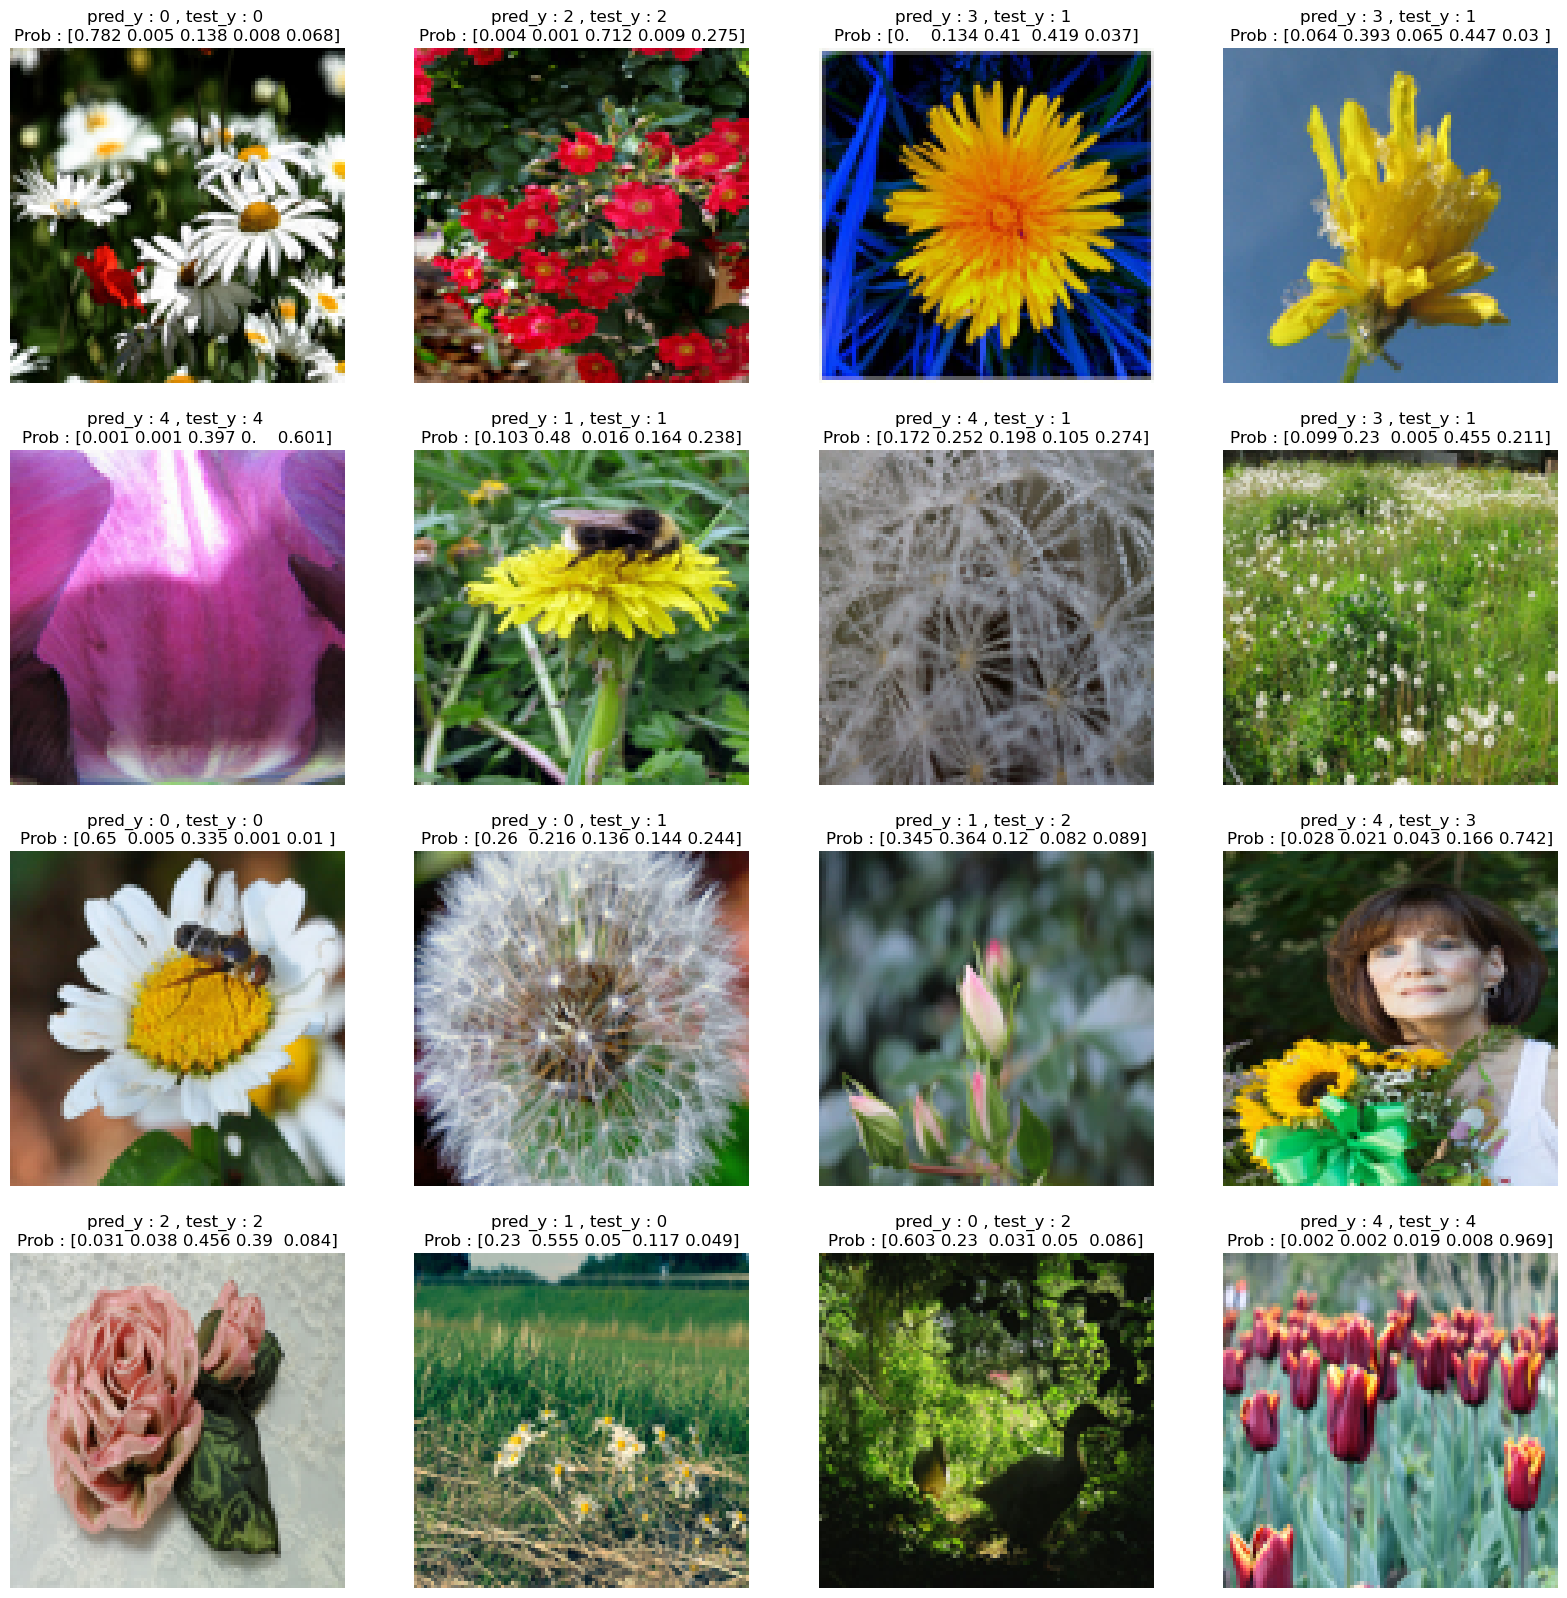

In [81]:
plt.figure(figsize=(20,20))

for i in range(16):
    
    plt.subplot(4,4,i+1)
    
    i = np.random.choice(864)
    img = test_x[i]
    plt.imshow(img)
    
    plt.title('pred_y : {} , test_y : {} \nProb : {}'.format(np.argmax(pred_y[i]), np.argmax(test_y[i]), np.round(pred_y[i],3)))
    plt.axis('off')

plt.draw()

plt.show()

### 데이터 셔플링
### 학습 데이터와 테스트 데이터를 분할
### 독립 종속 분할
### 컴파일
### 학습
### 평가
### 예측